### Customer Segmentation Data using K-Means Clustering

#### Dataset: Customer Personality Analysis
Source: [Customer Personality Analysis Dataset on Kaggle](https://www.kaggle.com/datasets/vishakhdapat/customer-segmentation-clustering)

---

#### 🧾 Dataset Description

The **Customer Personality Analysis** dataset is sourced from Kaggle and provides comprehensive insights into customer demographics, purchasing behaviors, and responses to marketing campaigns.

This dataset aims to assist businesses in performing customer personality analysis by understanding key characteristics such as:

- **Demographic Attributes**: Includes `Year_Birth`, `Education`, `Marital_Status`, `Income`, and household composition (`Kidhome`, `Teenhome`).
- **Purchase Behavior**: Captures amounts spent on different product categories such as `MntWines`, `MntMeatProducts`, `MntGoldProds`, etc., and purchase channels like `NumWebPurchases`, `NumCatalogPurchases`, and `NumStorePurchases`.
- **Engagement & Interaction**: Includes details such as `Recency` (days since last purchase), `NumWebVisitsMonth`, and whether the customer responded to any of the marketing campaigns (`AcceptedCmp1` to `AcceptedCmp5`, `Response`).
- **Customer Feedback**: Captured by the `Complain` field.

These features provide a rich view of customer behavior, helping the company better understand and categorize its clientele for strategic decision-making.

---

#### ❓ Problem Statement

The primary objective of this project is to perform **customer segmentation** using **K-Means Clustering**, based on customer purchasing patterns and behaviors.

Through this clustering approach, we aim to:

- Identify natural groupings within the customer base.
- Understand distinct profiles of each segment.
- Enable the business to create **targeted marketing strategies** and **personalized product recommendations** for different customer groups.

This approach will help the company:
- Allocate resources more efficiently.
- Improve marketing ROI.
- Enhance customer satisfaction and retention.

Ultimately, this segmentation will drive more **data-informed** and **customer-centric** business strategies.


### 1. Data Import & Initial Checks

This is the first step, where we prepare the environment and get our data ready for analysis:


#### Import libraries

In [517]:
# import necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
from sklearn.cluster import KMeans # clustering algorithms
from sklearn.preprocessing import StandardScaler, LabelEncoder # feature scaling, encoding
from sklearn.metrics import silhouette_score # silhouette score for evaluating clustering
from yellowbrick.cluster import KElbowVisualizer # elbow method for optimal k
from sklearn.decomposition import PCA # Principal Component Analysis for dimensionality reduction
import joblib # for saving and loading models

#### Load dataset

In [518]:
# load the dataset
data = pd.read_csv('customer_segmentation.csv')
df = data.copy()

#### Initial Exploration

In [519]:
# check first few rows of the dataset
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [520]:
# check shape of the dataset
df.shape

(2240, 29)

In [521]:
# check columns names
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [522]:
# check column and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [523]:
# descriptive statistics for the numerical features
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [524]:
# descriptive statistics for categorical features
df.describe(include='object')

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [525]:
# view Education unique values
df['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [526]:
# view Marital_Status unique values
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

#### Duplicate check

In [527]:
# duplicate check
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")
df[duplicates]

Number of duplicate rows: 0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


#### Missing Values Check

In [528]:
# missing values check
missing_values = df.isnull().sum()
print("Missing values in each column:")
missing_values[missing_values > 0]

Missing values in each column:


Income    24
dtype: int64

### 2. Data Cleaning

In this step, we address data quality issues:

In [529]:
# replace missing values in 'Income' with the median
df['Income'] = df['Income'].fillna(df['Income'].median())

In [530]:
# check for missing values again
missing_values = df.isna().sum().sum()
print("Missing values in the DataFrame:")
missing_values

Missing values in the DataFrame:


0

In [531]:
# date columns conversion
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')

In [532]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          916 non-null    datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

### 3. Feature Engineering

We create, modify, or transform features to improve model performance:

In [533]:
# calculate customer age
df['Age'] = (pd.to_datetime('now').year - df['Year_Birth'])
df['Age'].describe()

count    2240.000000
mean       56.194196
std        11.984069
min        29.000000
25%        48.000000
50%        55.000000
75%        66.000000
max       132.000000
Name: Age, dtype: float64

In [534]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,0,0,3,11,1,68
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,0,0,3,11,0,71
2,4141,1965,Graduation,Together,71613.0,0,0,NaT,26,426,...,0,0,0,0,0,0,3,11,0,60
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,0,0,3,11,0,41
4,5324,1981,PhD,Married,58293.0,1,0,NaT,94,173,...,0,0,0,0,0,0,3,11,0,44


In [535]:
# calculate total children
df['Total_Children'] = df['Kidhome'] + df['Teenhome']
df['Total_Children'].describe()

count    2240.000000
mean        0.950446
std         0.751803
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Total_Children, dtype: float64

In [536]:
# calculate total spending
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                    'MntSweetProducts', 'MntGoldProds']
df['Total_Spending'] = df[spending_columns].sum(axis=1)
df['Total_Spending'].describe()

count    2240.000000
mean      605.798214
std       602.249288
min         5.000000
25%        68.750000
50%       396.000000
75%      1045.500000
max      2525.000000
Name: Total_Spending, dtype: float64

In [537]:
# calculate customer tenure
df['Customer_Since'] = (pd.to_datetime('now') - df['Dt_Customer']).dt.days
df['Customer_Since'].describe()

count     916.000000
mean     4403.766376
std       269.524649
min      3881.000000
25%      4242.000000
50%      4403.500000
75%      4580.250000
max      4944.000000
Name: Customer_Since, dtype: float64

In [538]:
# create a new column for accepted campaigns
df['AcceptedAny'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum(axis=1).astype(int)
df['AcceptedAny'].unique()

array([1, 0, 3, 2, 4, 5])

In [539]:
# convert AcceptedAny to binary
df['AcceptedAny'] = df['AcceptedAny'].apply(lambda x: 1 if x > 0 else 0)
df['AcceptedAny'].unique()

array([1, 0])

In [540]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Children,Total_Spending,Customer_Since,AcceptedAny
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,3,11,1,68,0,1617,4852.0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,3,11,0,71,2,27,4006.0,0
2,4141,1965,Graduation,Together,71613.0,0,0,NaT,26,426,...,0,0,3,11,0,60,0,776,NaN,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,3,11,0,41,1,53,3946.0,0
4,5324,1981,PhD,Married,58293.0,1,0,NaT,94,173,...,0,0,3,11,0,44,1,422,NaN,0


### 4. Exploratory Data Analysis (EDA)

EDA helps uncover patterns, spot anomalies, and test hypotheses:

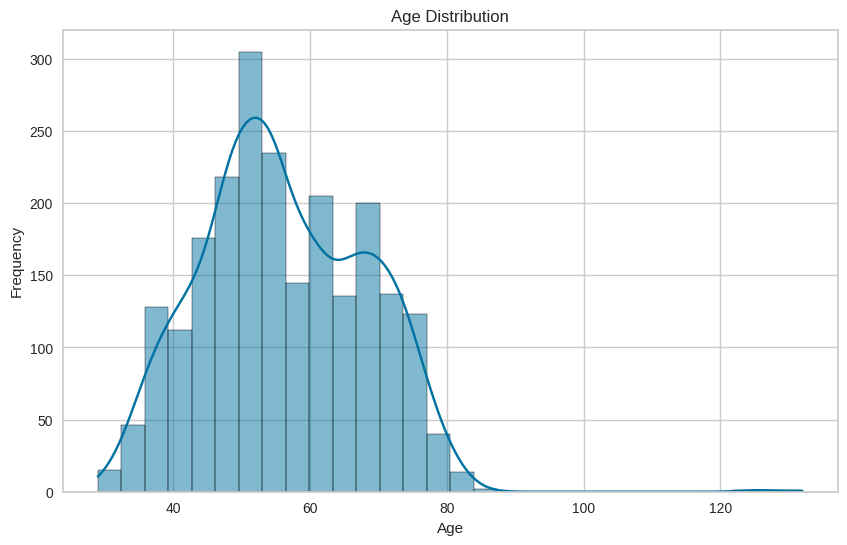

In [541]:
# visualize the distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')    
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

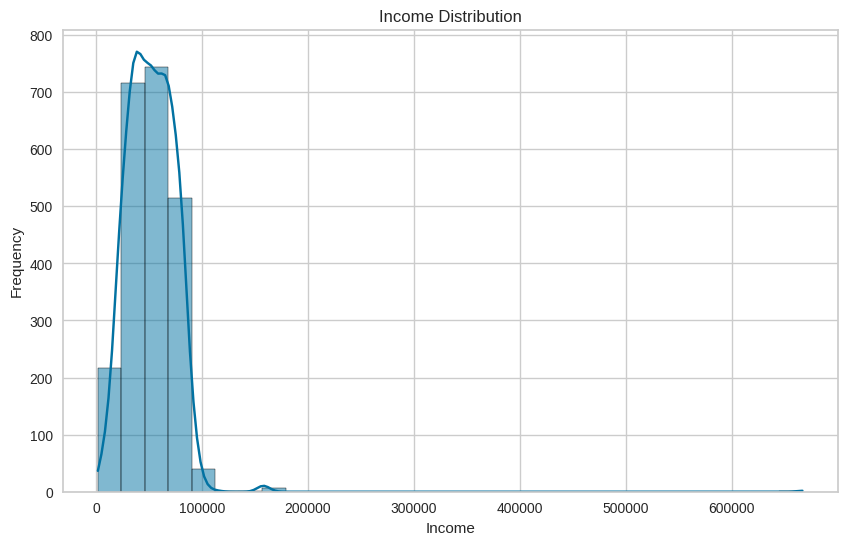

In [542]:
#  visualize the distribution of Income
plt.figure(figsize=(10, 6))
sns.histplot(df['Income'], bins=30, kde=True)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

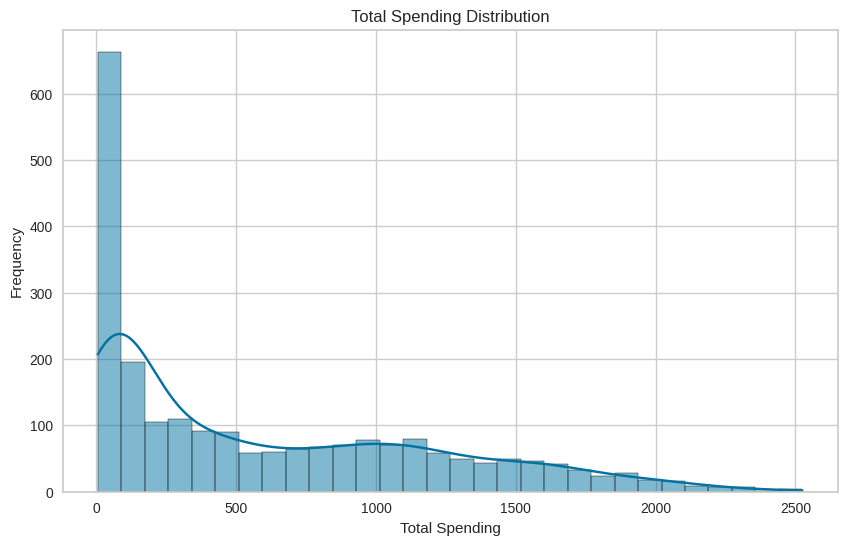

In [543]:
# visualize the distribution of Total Spending
plt.figure(figsize=(10, 6))
sns.histplot(df['Total_Spending'], bins=30, kde=True)
plt.title('Total Spending Distribution')
plt.xlabel('Total Spending')
plt.ylabel('Frequency')
plt.show()

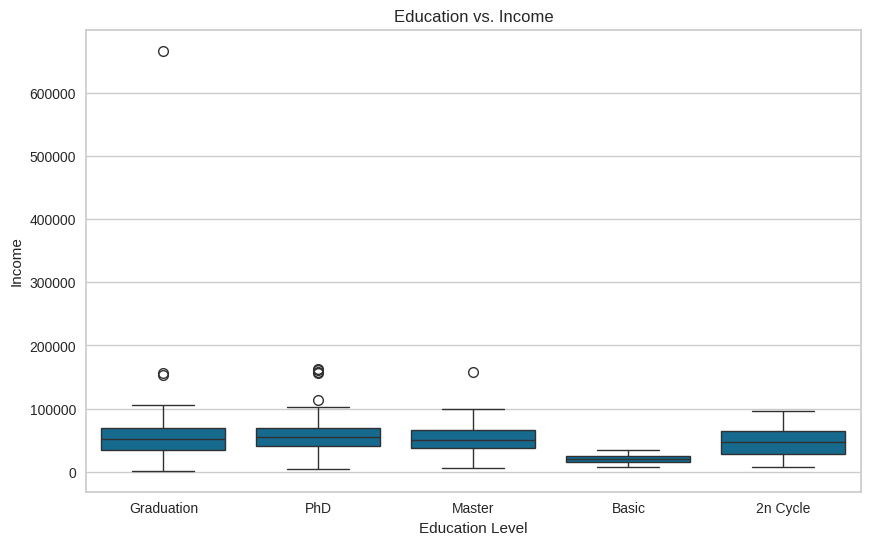

In [544]:
# visualize Education vs. Income
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education', y='Income', data=df)
plt.title('Education vs. Income')
plt.xlabel('Education Level')
plt.ylabel('Income')
plt.show()

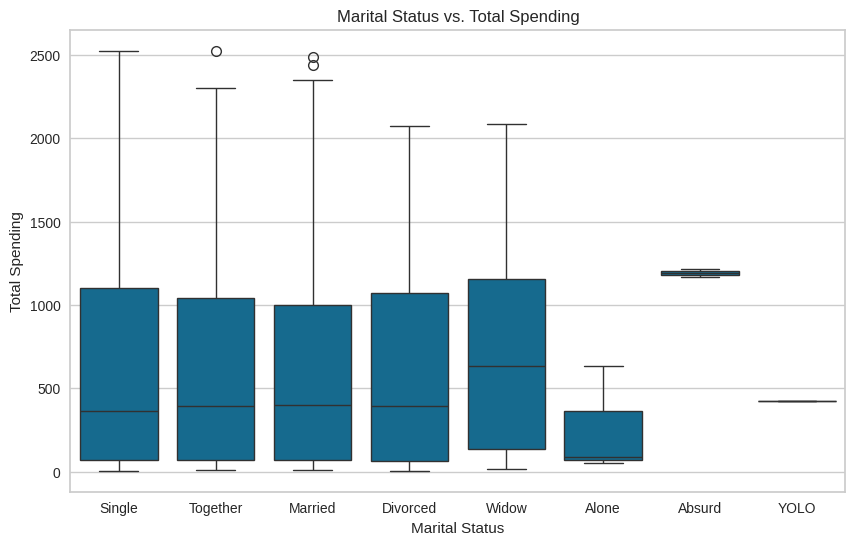

In [545]:
# visualize marital status vs. Total Spending
plt.figure(figsize=(10, 6))
sns.boxplot(x='Marital_Status', y='Total_Spending', data=df)
plt.title('Marital Status vs. Total Spending')
plt.xlabel('Marital Status')
plt.ylabel('Total Spending')
plt.show()

In [546]:
# find average spending by education
avg_spending_by_education = df.groupby('Education')['Total_Spending'].mean().sort_values(ascending=False)
avg_spending_by_education

Education
PhD           672.409465
Graduation    619.898846
Master        611.781081
2n Cycle      496.527094
Basic          81.796296
Name: Total_Spending, dtype: float64

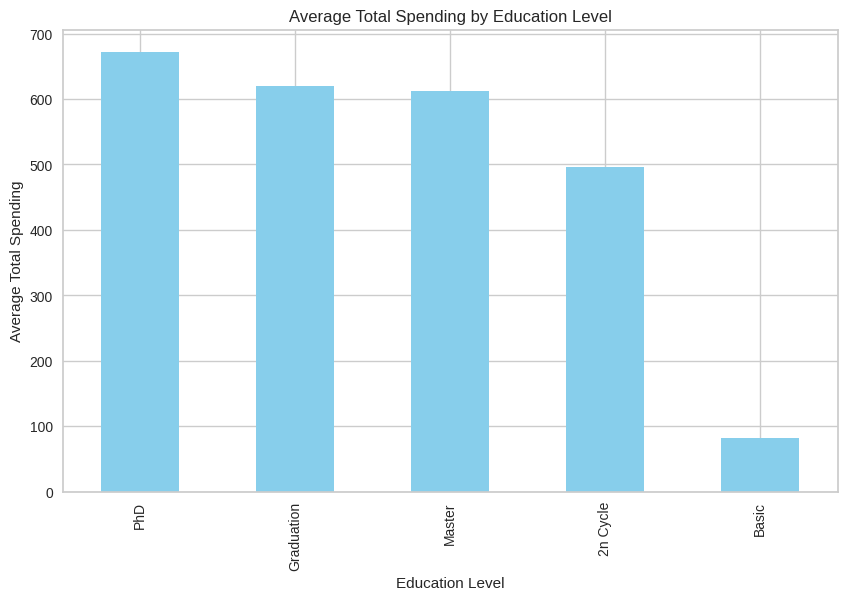

In [547]:
# plot average spending by education
avg_spending_by_education.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Average Total Spending by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Total Spending')
plt.show()

In [548]:
# find average by AcceptedAny and marital status
avg_by_accepted_any = df.groupby('Marital_Status')['AcceptedAny'].mean().sort_values(ascending=False)
avg_by_accepted_any

Marital_Status
Absurd      0.500000
YOLO        0.500000
Widow       0.350649
Alone       0.333333
Single      0.308333
Divorced    0.297414
Married     0.251157
Together    0.250000
Name: AcceptedAny, dtype: float64

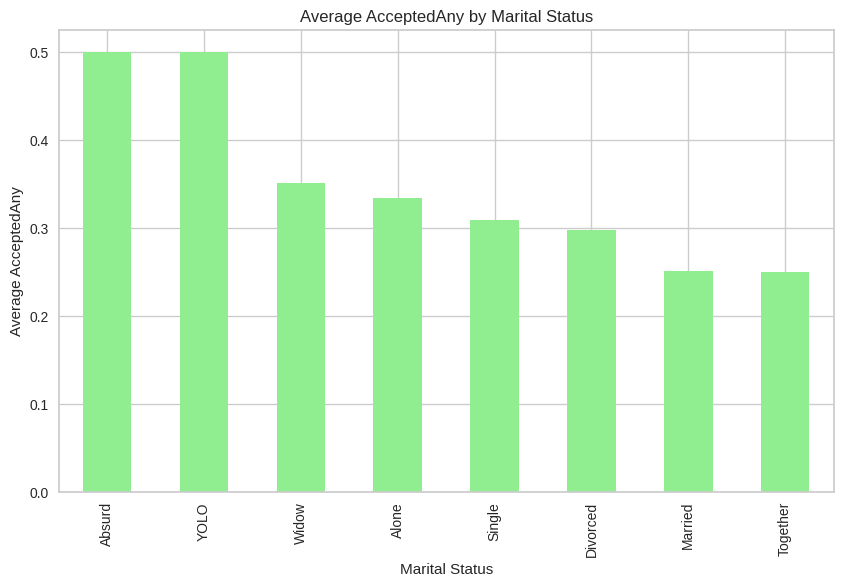

In [549]:
avg_by_accepted_any.plot(kind='bar', figsize=(10, 6), color='lightgreen')
plt.title('Average AcceptedAny by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Average AcceptedAny')
plt.show()

In [550]:
# find average income by age groups
bins = [18, 30, 40, 50, 60, 70, 90]
labels = ['18-20', '30-40', '40-50', '50-60', '60-70', '70+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [551]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Children,Total_Spending,Customer_Since,AcceptedAny,Age_Group
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,3,11,1,68,0,1617,4852.0,1,60-70
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,3,11,0,71,2,27,4006.0,0,70+
2,4141,1965,Graduation,Together,71613.0,0,0,NaT,26,426,...,0,3,11,0,60,0,776,NaN,0,60-70
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,3,11,0,41,1,53,3946.0,0,40-50
4,5324,1981,PhD,Married,58293.0,1,0,NaT,94,173,...,0,3,11,0,44,1,422,NaN,0,40-50


In [552]:
# find average income by age group
avg_income_by_age_group = df.groupby('Age_Group')['Income'].mean().sort_values(ascending=False)
avg_income_by_age_group

/tmp/ipykernel_45155/3969107183.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_income_by_age_group = df.groupby('Age_Group')['Income'].mean().sort_values(ascending=False)


Age_Group
70+      58686.145205
60-70    55914.604675
50-60    50488.540876
40-50    48083.863636
30-40    47942.652406
18-20    10960.500000
Name: Income, dtype: float64

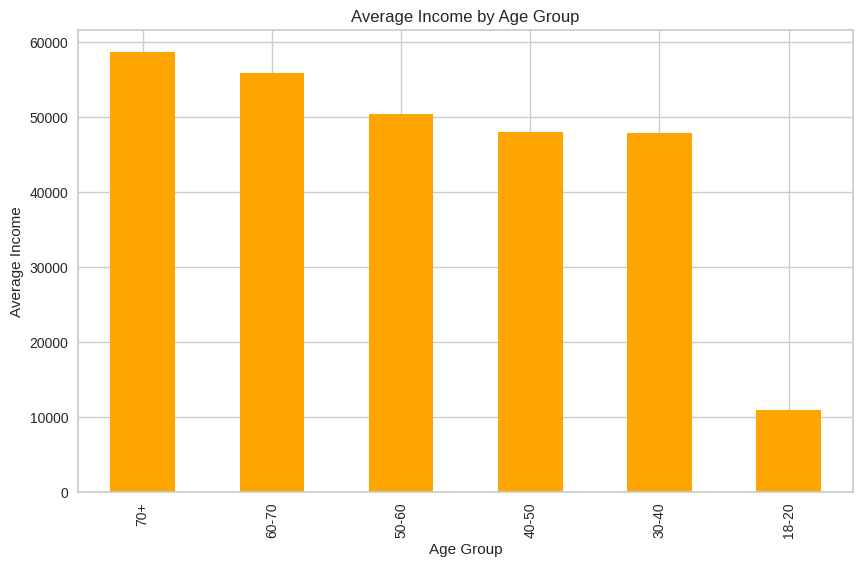

In [553]:
# plot average income by age group
plt.figure(figsize=(10, 6))
avg_income_by_age_group.plot(kind='bar', figsize=(10, 6), color='orange')
plt.title('Average Income by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Income')
plt.show()

### 5. Feature Selection

In [554]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Children', 'Total_Spending', 'Customer_Since',
       'AcceptedAny', 'Age_Group'],
      dtype='object')

In [555]:
# correlation features
corr = df[['Income', 'Age', 'Total_Spending', 'Recency', 'NumWebPurchases', 'NumStorePurchases']].corr()
corr

,Income,Age,Total_Spending,Recency,NumWebPurchases,NumStorePurchases
Income,1.000000,0.160899,0.664775,-0.004061,0.380554,0.526600
Age,0.160899,1.000000,0.111306,0.019871,0.145040,0.128272
Total_Spending,0.664775,0.111306,1.000000,0.020433,0.519837,0.674669
Recency,-0.004061,0.019871,0.020433,1.000000,-0.010726,0.000799
NumWebPurchases,0.380554,0.145040,0.519837,-0.010726,1.000000,0.502713
NumStorePurchases,0.526600,0.128272,0.674669,0.000799,0.502713,1.000000


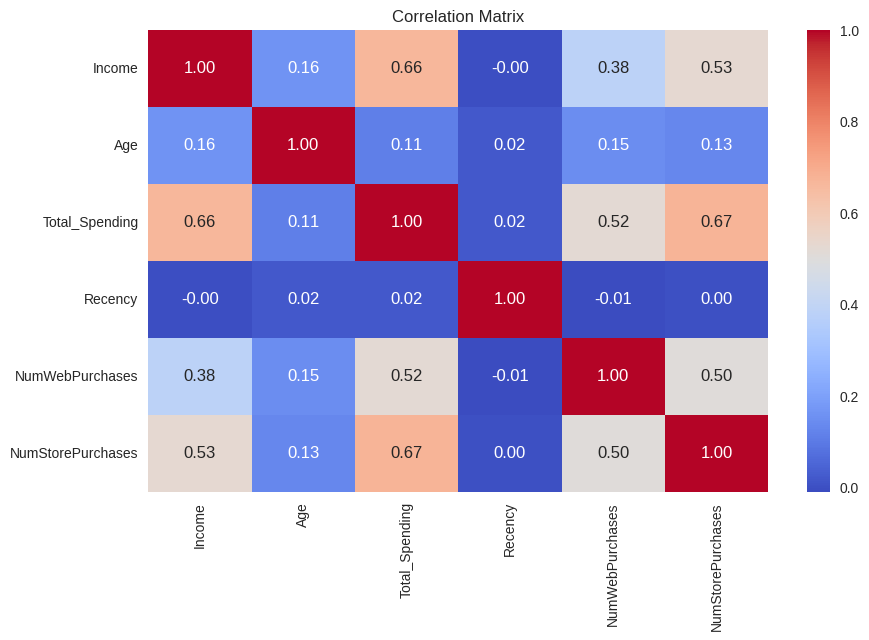

In [556]:
# visualize correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()  

In [557]:
# pivot income
pivot_income = df.pivot_table(values='Income', index='Education', columns='Marital_Status', aggfunc='mean')
pivot_income

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Education,,,,,,,,
2n Cycle,NaN,NaN,49395.130435,46265.055556,53611.986486,44852.991228,51392.200000,NaN
Basic,NaN,NaN,9548.000000,21960.500000,18238.666667,21240.071429,22123.000000,NaN
Graduation,79244.0,34176.0,54526.042017,50805.628176,51323.595238,55743.176573,54976.657143,NaN
Master,65487.0,61331.0,50331.945946,53286.028986,53530.560000,52081.556604,57816.541667,NaN
PhD,NaN,35860.0,53096.615385,58067.651042,53275.163265,56001.594017,60288.083333,48432.0


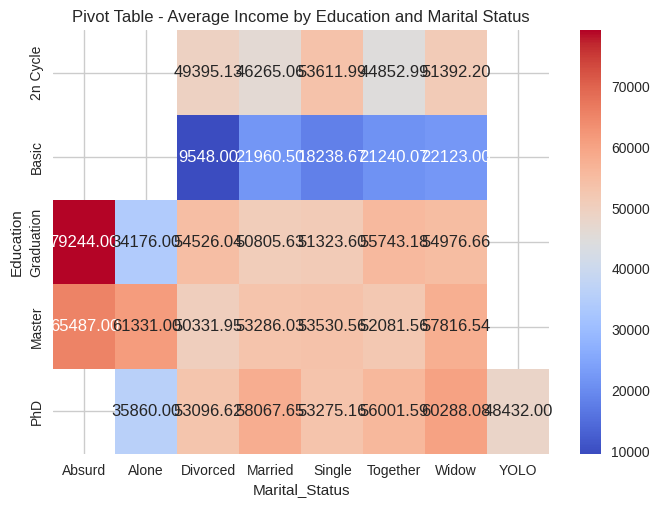

In [558]:
sns.heatmap(pivot_income, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Pivot Table - Average Income by Education and Marital Status')
plt.show()

In [559]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Children', 'Total_Spending', 'Customer_Since',
       'AcceptedAny', 'Age_Group'],
      dtype='object')

In [560]:
# define features for clustering
features = ['Income', 'Age', 'Total_Spending', 'Recency', 'NumWebPurchases', 'NumStorePurchases', 'AcceptedAny', 'NumWebVisitsMonth']
X = df[features].copy()

In [561]:
X.head()

,Income,Age,Total_Spending,Recency,NumWebPurchases,NumStorePurchases,AcceptedAny,NumWebVisitsMonth
0,58138.0,68,1617,58,8,4,1,7
1,46344.0,71,27,38,1,2,0,5
2,71613.0,60,776,26,8,10,0,4
3,26646.0,41,53,26,2,4,0,6
4,58293.0,44,422,94,5,6,0,5


In [562]:
X.shape

(2240, 8)

In [563]:
X.shape

(2240, 8)

### 6. Data Preprocessing

In [564]:
# do feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [565]:
X_scaled_df = pd.DataFrame(X_scaled, columns=features)
X_scaled_df.head()

,Income,Age,Total_Spending,Recency,NumWebPurchases,NumStorePurchases,AcceptedAny,NumWebVisitsMonth
0,0.235696,0.985345,1.679417,0.307039,1.409304,-0.550785,1.636509,0.693904
1,-0.235454,1.235733,-0.961275,-0.383664,-1.110409,-1.166125,-0.611057,-0.130463
2,0.773999,0.317643,0.282673,-0.798086,1.409304,1.295237,-0.611057,-0.542647
3,-1.022355,-1.268149,-0.918094,-0.798086,-0.750450,-0.550785,-0.611057,0.281720
4,0.241888,-1.017761,-0.305254,1.550305,0.329427,0.064556,-0.611057,-0.130463


In [566]:
X_scaled

array([[ 0.23569584,  0.98534473,  1.67941681, ..., -0.55078479,
         1.63650876,  0.69390374],
       [-0.23545419,  1.23573295, -0.96127545, ..., -1.1661254 ,
        -0.61105692, -0.13046347],
       [ 0.77399892,  0.3176428 ,  0.28267329, ...,  1.29523705,
        -0.61105692, -0.54264708],
       ...,
       [ 0.18947568, -1.01776106,  1.05495122, ...,  2.21824797,
         1.63650876,  0.28172013],
       [ 0.67940139,  1.06880747,  0.39394775, ...,  1.29523705,
        -0.61105692, -0.95483068],
       [ 0.02520835,  1.23573295, -0.7204576 , ..., -0.55078479,
         1.63650876,  0.69390374]])

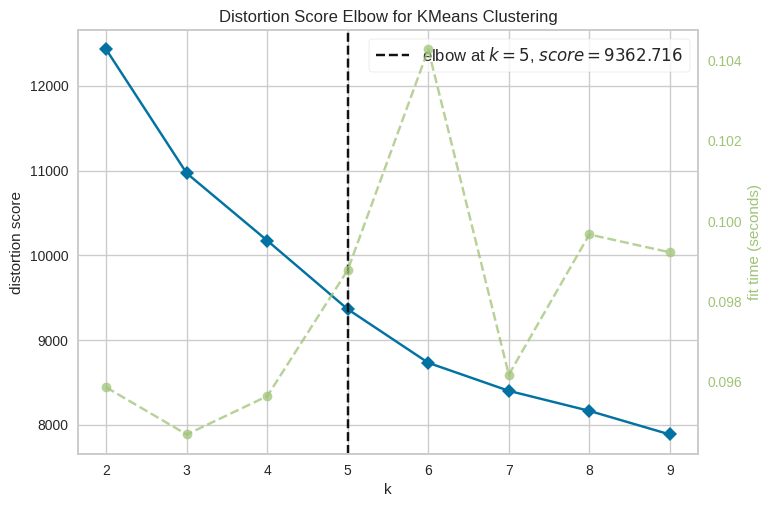

In [567]:
# getting optimal number of clusters using yellowbrick
kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(2,10))
visualizer.fit(X_scaled)
visualizer.show()
plt.show()

### 7. Model Selection & Training

In [568]:
# model selection & training using the optimal number of clusters from the elbow method
kmeans = KMeans(n_clusters=visualizer.elbow_value_, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=5, random_state=42)

In [569]:
# assign cluster labels to the original dataframe
df['Cluster'] = kmeans.labels_

In [570]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_CostContact,Z_Revenue,Response,Age,Total_Children,Total_Spending,Customer_Since,AcceptedAny,Age_Group,Cluster
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,3,11,1,68,0,1617,4852.0,1,60-70,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,3,11,0,71,2,27,4006.0,0,70+,0
2,4141,1965,Graduation,Together,71613.0,0,0,NaT,26,426,...,3,11,0,60,0,776,NaN,0,60-70,2
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,3,11,0,41,1,53,3946.0,0,40-50,0
4,5324,1981,PhD,Married,58293.0,1,0,NaT,94,173,...,3,11,0,44,1,422,NaN,0,40-50,0


In [571]:
# cluster means
cluster_means = df.groupby('Cluster')[features].mean().reset_index()
cluster_means

,Cluster,Income,Age,Total_Spending,Recency,NumWebPurchases,NumStorePurchases,AcceptedAny,NumWebVisitsMonth
0,0,34688.950610,53.649279,103.067703,51.482797,2.091010,3.288568,0.000000,6.408435
1,1,77559.315068,57.276712,1459.205479,47.060274,5.635616,8.301370,0.997260,3.591781
2,2,58747.825203,60.715447,824.051491,49.674797,7.737127,7.785908,0.056911,6.208672
3,3,71000.333333,57.451444,964.131234,51.251969,4.026247,8.517060,0.000000,2.435696
4,4,38929.000000,55.080357,268.325893,38.325893,3.660714,3.834821,1.000000,7.165179


**Cluster 0 – “Low-Spend Active Customers”**
- **Income**: Low  
- **Spending**: Low  
- **Recency**: Recent buyers (low recency score)  
- **Purchases**: Low web and store purchases  
- **Campaign Response**: Moderately low  
- **Notes**: These customers are still active but do not spend much.  
✅ **Label**: `Low-Spend Active Customers`


**Cluster 1 – “High-Value Engaged Customers”**
- **Income**: High  
- **Spending**: Very high  
- **Recency**: Fairly recent  
- **Purchases**: Very active online and in stores  
- **Campaign Response**: 100% acceptance of marketing campaigns  
- **Notes**: The ideal customer segment — wealthy, loyal, and highly responsive.  
✅ **Label**: `High-Value Engaged Customers`


 **Cluster 2 – “Affluent but Unengaged Customers”**
- **Income**: High  
- **Spending**: High  
- **Recency**: Moderate  
- **Purchases**: High in-store, moderate web  
- **Campaign Response**: 0% response  
- **Notes**: High potential customers who are not engaging with campaigns.  
✅ **Label**: `Affluent but Unengaged Customers`


**Cluster 3 – “Disengaged Low Spenders”**
- **Income**: Low  
- **Spending**: Low  
- **Recency**: Very high (last interaction was long ago)  
- **Purchases**: Low across all channels  
- **Campaign Response**: Very low  
- **Notes**: Not actively shopping or responding — likely churned.  
✅ **Label**: `Disengaged Low Spenders`


 **Cluster 4 – “Online Shoppers with Low Loyalty”**
- **Income**: Medium-High  
- **Spending**: Moderate to high  
- **Recency**: Moderate  
- **Purchases**: Very high web purchases, high in-store  
- **Campaign Response**: Very low  
- **Notes**: Tech-savvy buyers who prefer online shopping but don’t respond to campaigns.  
✅ **Label**: `Online Shoppers with Low Loyalty`

Text(0, 0.5, 'Number of Customers')

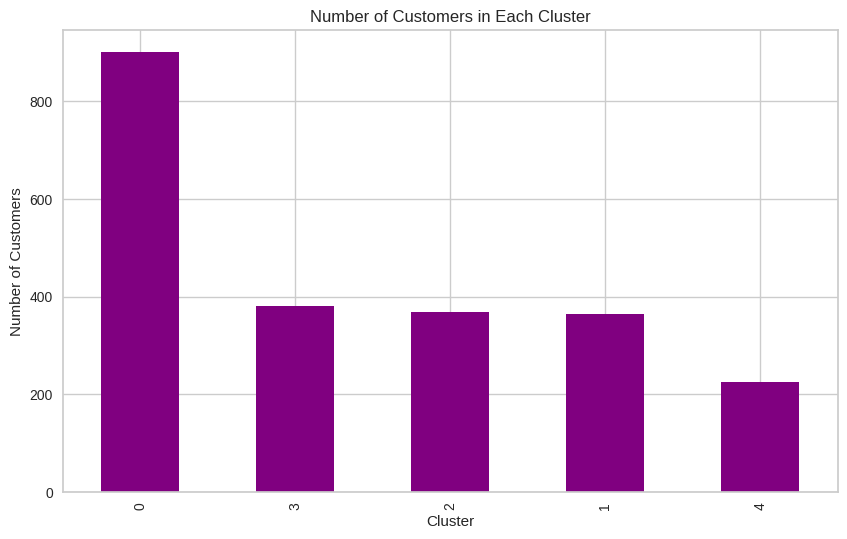

In [572]:
# plot number of customers in each cluster
clusters = df['Cluster'].value_counts()
clusters.plot(kind='bar', figsize=(10, 6), color='purple')
plt.title('Number of Customers in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')

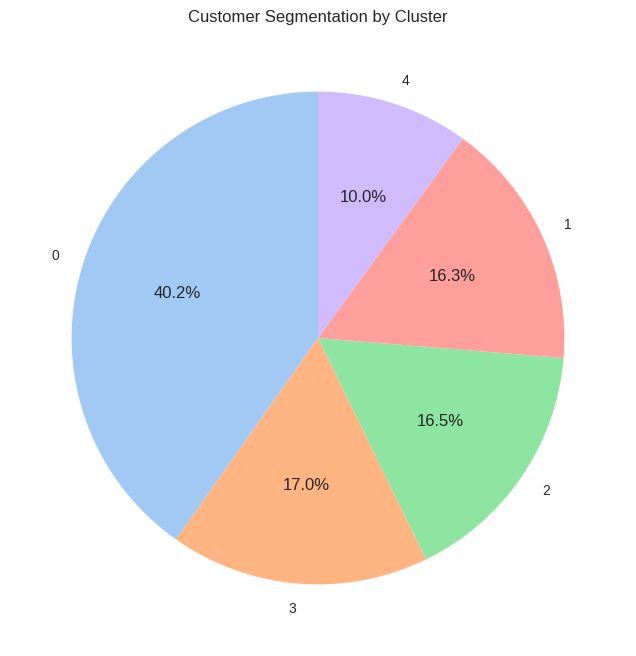

In [573]:
# plot pie chart of clusters
plt.figure(figsize=(8, 8))
clusters.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Customer Segmentation by Cluster')
plt.ylabel('')
plt.show()

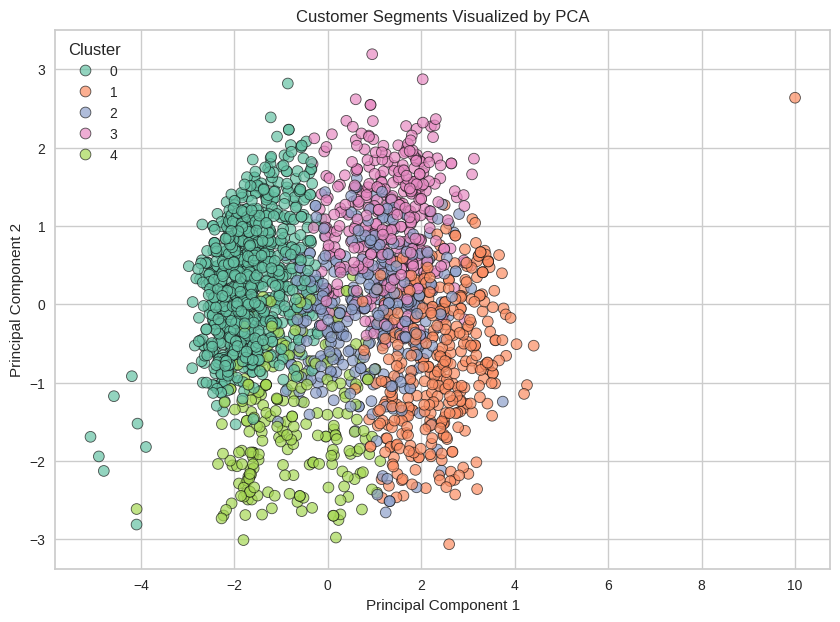

In [574]:
# cluster Visualization using PCA
scaler1 = StandardScaler()
normalized_data = scaler1.fit_transform(X_scaled_df)

# Reduce to 2 principal components for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(normalized_data)

# Plot clusters in PCA space
plt.figure(figsize=(10, 7))
palette = sns.color_palette('Set2', df['Cluster'].nunique())
sns.scatterplot(
    x=pca_data[:, 0], y=pca_data[:, 1],
    hue=df['Cluster'],
    palette=palette,
    alpha=0.7,
    s=60,
    edgecolor='k'
)
plt.title('Customer Segments Visualized by PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [575]:
# function to map cluster numbers to descriptive labels
def map_cluster_to_label(cluster_number):
    cluster_labels = {
        0: "Low-Spend Active Customers",
        1: "High-Value Engaged Customers",
        2: "Affluent but Unengaged Customers",
        3: "Disengaged Low Spenders",
        4: "Online Shoppers with Low Loyalty"
    }
    return cluster_labels.get(cluster_number, "Unknown Cluster")

In [576]:
# apply the mapping function to create a new column with descriptive labels
df['Cluster_Label'] = df['Cluster'].apply(map_cluster_to_label)

In [577]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_Revenue,Response,Age,Total_Children,Total_Spending,Customer_Since,AcceptedAny,Age_Group,Cluster,Cluster_Label
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,11,1,68,0,1617,4852.0,1,60-70,1,High-Value Engaged Customers
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,11,0,71,2,27,4006.0,0,70+,0,Low-Spend Active Customers
2,4141,1965,Graduation,Together,71613.0,0,0,NaT,26,426,...,11,0,60,0,776,NaN,0,60-70,2,Affluent but Unengaged Customers
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,11,0,41,1,53,3946.0,0,40-50,0,Low-Spend Active Customers
4,5324,1981,PhD,Married,58293.0,1,0,NaT,94,173,...,11,0,44,1,422,NaN,0,40-50,0,Low-Spend Active Customers


In [578]:
# save the model
joblib.dump(kmeans, 'kmeans_model.pkl')

# save the scaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [579]:
# example of how to load the model and scaler and make predictions
loaded_kmeans = joblib.load('kmeans_model.pkl')
loaded_scaler = joblib.load('scaler.pkl')

# create new_data with the same features and order as used for clustering
new_data = pd.DataFrame({
    'Income': [50000],             
    'Age': [45],                    
    'Total_Spending': [600],        
    'Recency': [30],                
    'NumWebPurchases': [5],         
    'NumStorePurchases': [4],       
    'AcceptedAny': [1],             
    'NumWebVisitsMonth': [6]        
})

# scale the new data
scaled_data = loaded_scaler.transform(new_data)

# predict the cluster
predicted_cluster = loaded_kmeans.predict(scaled_data)[0]

# map the predicted cluster to a label
predicted_label = map_cluster_to_label(predicted_cluster)

print("Predicted Cluster:", predicted_cluster)
print("Predicted Label:", predicted_label)

Predicted Cluster: 4
Predicted Label: Online Shoppers with Low Loyalty


### 8. Model Evaluation

**How do you know if you've organized students well?**

- **Silhouette Score:** Students should be close to their classmates, far from other classes
- **Inertia:** Students shouldn't be too far from their class center
- **Elbow Method:** Find the sweet spot for number of classes

In [ ]:
# model evaluation using silhouette score
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg:.2f}")